In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('NY data summary Interpolated lag 12.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,3/1/2005,215.719341,5.93,46445.0,18798.1140,4.8,1096833.984,687.39410,32.90%,214701.0,0.90%,5852.065587,2.39,186.9
1,4/1/2005,216.433534,5.86,46844.7,18800.8659,4.8,1102432.129,685.96012,32.90%,215126.0,0.87%,4700.094832,2.74,187.9
2,5/1/2005,216.619664,5.72,47244.4,18803.6178,4.7,1108030.274,684.52614,32.90%,215551.0,0.83%,4978.336136,2.65,188.4
3,6/1/2005,216.195575,5.58,47644.1,18806.3697,4.8,1113628.419,683.09216,32.90%,215976.0,0.80%,4541.492838,2.49,187.6
4,7/1/2005,215.050631,5.70,48043.8,18809.1216,4.8,1119226.564,681.65818,32.83%,216901.0,0.83%,4545.705558,2.50,189.2
5,8/1/2005,213.097963,5.82,48443.5,18811.8735,4.9,1124824.709,680.22420,32.77%,217826.0,0.87%,5644.986814,2.24,191.3
6,9/1/2005,213.026350,5.77,48843.2,18814.6254,5.0,1130422.853,678.79022,32.70%,218751.0,0.90%,4939.945161,1.93,195.5
7,10/1/2005,213.028942,6.07,49242.9,18817.3773,5.0,1136020.998,677.35624,32.63%,219900.0,0.90%,4275.704563,1.99,194.5
8,11/1/2005,213.161021,6.33,49642.6,18820.1292,5.0,1141619.143,675.92226,32.57%,221049.0,0.90%,4456.121242,2.27,193.1
9,12/1/2005,213.254773,6.27,50042.3,18822.8811,4.9,1147217.288,674.48828,32.50%,222198.0,0.90%,4594.430120,2.47,191.8


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,215.719341,5.93,46445.0,18798.1140,4.8,1096833.984,687.39410,214701.0,5852.065587,2.39,186.9,32.90,0.90
1,4/1/2005,216.433534,5.86,46844.7,18800.8659,4.8,1102432.129,685.96012,215126.0,4700.094832,2.74,187.9,32.90,0.87
2,5/1/2005,216.619664,5.72,47244.4,18803.6178,4.7,1108030.274,684.52614,215551.0,4978.336136,2.65,188.4,32.90,0.83
3,6/1/2005,216.195575,5.58,47644.1,18806.3697,4.8,1113628.419,683.09216,215976.0,4541.492838,2.49,187.6,32.90,0.80
4,7/1/2005,215.050631,5.70,48043.8,18809.1216,4.8,1119226.564,681.65818,216901.0,4545.705558,2.50,189.2,32.83,0.83


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,46445.00000,18798.11400,4.8,1096833.984,687.39410,214701.0000,5852.065587,2.39,186.900,32.90,0.90
1,5.86,46844.70000,18800.86590,4.8,1102432.129,685.96012,215126.0000,4700.094832,2.74,187.900,32.90,0.87
2,5.72,47244.40000,18803.61780,4.7,1108030.274,684.52614,215551.0000,4978.336136,2.65,188.400,32.90,0.83
3,5.58,47644.10000,18806.36970,4.8,1113628.419,683.09216,215976.0000,4541.492838,2.49,187.600,32.90,0.80
4,5.70,48043.80000,18809.12160,4.8,1119226.564,681.65818,216901.0000,4545.705558,2.50,189.200,32.83,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...
137,3.44,71263.83333,19327.67825,4.9,1674944.874,578.56120,244194.3333,4041.021003,2.98,225.474,28.60,3.27
138,3.46,71629.66667,19326.66400,4.9,1679934.755,577.53200,243963.0000,3512.213575,2.52,226.127,28.50,3.20
139,3.47,71995.50000,19325.64975,4.8,1684924.637,576.50280,244127.0000,3988.185341,2.13,225.612,28.33,3.10
140,3.77,72361.33333,19324.63550,4.7,1689914.518,575.47360,244291.0000,3415.737205,2.27,225.624,28.17,3.00


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),142.0,4.834930e+00,1.054379,3.350000e+00,3.925000e+00,4.555000e+00,5.927500e+00,6.760000e+00
Personal_Income,142.0,5.868404e+04,6406.114933,4.644500e+04,5.400465e+04,5.756483e+04,6.342077e+04,7.272717e+04
Resident_Population,142.0,1.909498e+04,176.569642,1.879811e+04,1.894877e+04,1.906514e+04,1.927979e+04,1.933478e+04
Unemployment_Rate,142.0,6.563380e+00,1.817663,4.200000e+00,4.800000e+00,6.150000e+00,8.600000e+00,9.300000e+00
GDP,142.0,1.362106e+06,174254.163609,1.096834e+06,1.196857e+06,1.313428e+06,1.507918e+06,1.694904e+06
Crime_Rate,142.0,6.109531e+02,33.920085,5.518095e+02,5.839645e+02,6.089114e+02,6.325315e+02,6.873941e+02
Median_Debt,142.0,2.436011e+05,9430.239392,2.147010e+05,2.441307e+05,2.457763e+05,2.497561e+05,2.531410e+05
New_Structures,142.0,3.422581e+03,2394.003216,1.017219e+03,1.811915e+03,3.181244e+03,4.370401e+03,1.751628e+04
Economic_Conditions_Index,142.0,2.330282e+00,1.402109,-3.190000e+00,2.310000e+00,2.750000e+00,3.050000e+00,4.050000e+00
CPI less shelter,142.0,2.141817e+02,12.866480,1.869000e+02,2.036525e+02,2.155000e+02,2.256270e+02,2.302770e+02


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.038593,-1.910524,-1.681307,-0.970136,-1.522330,2.253560,-3.064620,1.014821,0.042592,-2.120369,0.403005,-1.514791
1,0.972203,-1.848130,-1.665722,-0.970136,-1.490204,2.211285,-3.019552,0.533631,0.292216,-2.042648,0.403005,-1.527302
2,0.839424,-1.785737,-1.650137,-1.025152,-1.458078,2.169010,-2.974484,0.649855,0.228027,-2.003787,0.403005,-1.543983
3,0.706644,-1.723343,-1.634551,-0.970136,-1.425951,2.126735,-2.929416,0.467381,0.113913,-2.065964,0.403005,-1.556494
4,0.820455,-1.660950,-1.618966,-0.970136,-1.393825,2.084459,-2.831328,0.469141,0.121045,-1.941610,0.362745,-1.543983
...,...,...,...,...,...,...,...,...,...,...,...,...
137,-1.322987,1.963717,1.317873,-0.915120,1.795300,-0.954949,0.062908,0.258329,0.463386,0.877654,-2.070109,-0.526447
138,-1.304019,2.020824,1.312129,-0.915120,1.823936,-0.985291,0.038377,0.037440,0.135309,0.928406,-2.127623,-0.555639
139,-1.294534,2.077931,1.306385,-0.970136,1.852571,-1.015633,0.055768,0.236259,-0.142843,0.888380,-2.225397,-0.597341
140,-1.010007,2.135038,1.300641,-1.025152,1.881207,-1.045974,0.073158,-0.002859,-0.042994,0.889312,-2.317420,-0.639043


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

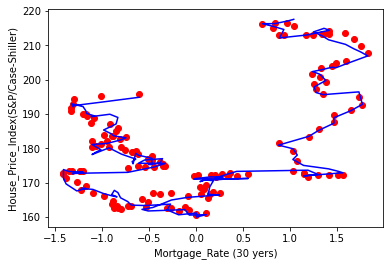

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.28
Accuracy: 99.28 %.


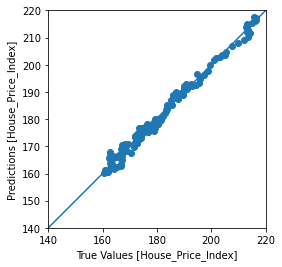

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9895827410115264

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,1.531456
1,-19.237820
2,-8.471386
3,4.146245
4,34.532842
5,6.347960
6,3.565711
7,0.534281
8,1.707458
9,-5.581244


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[217.54787177 217.05853501 216.3088658  216.26530325 215.50706178
 214.5925055  212.13964309 212.97466465 214.3675869  214.93134207
 213.87694241 212.72040617 211.59872151 210.2696179  209.02583393
 208.06572334 206.90985512 204.62854993 203.44086425 203.6287599
 202.86330878 202.35826835 201.60368997 199.77788369 197.89866007
 196.24961086 195.64040114 196.44626034 192.83593417 190.98263516
 188.92304678 187.32951873 185.25917783 183.51825746 180.96074659
 179.91845395 178.07259378 176.77895205 175.0565022  174.05801192
 173.33398392 172.91818949 171.99908173 172.45737121 173.66839346
 173.3170909  171.43269475 171.65391996 171.72421007 171.16460332
 171.06979103 171.2621245  171.11052241 171.14565948 170.85709499
 170.97713418 170.34015536 170.84945484 170.60915962 168.85220778
 166.62376855 166.4673982  166.06107131 165.76731162 164.99112797
 163.61356293 162.8129878  162.26944231 161.80386926 162.20001872
 160.60732899 160.73067366 160.04750349 161.21322333 160.69451234
 162.139886

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,217.547872
1,217.058535
2,216.308866
3,216.265303
4,215.507062
...,...
137,192.744523
138,192.094618
139,192.472797
140,193.441100


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,1.361058,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
Personal_Income,-1.910524,-1.848130,-1.785737,-1.723343,-1.660950,-1.598556,-1.536163,-1.473769,-1.411376,-1.348982,...,1.678183,1.735290,1.792397,1.849503,1.906610,1.963717,2.020824,2.077931,2.135038,2.192145
Resident_Population,-1.681307,-1.665722,-1.650137,-1.634551,-1.618966,-1.603381,-1.587795,-1.572210,-1.556625,-1.541039,...,1.346594,1.340850,1.335106,1.329362,1.323617,1.317873,1.312129,1.306385,1.300641,1.294896
Unemployment_Rate,-0.970136,-0.970136,-1.025152,-0.970136,-0.970136,-0.915120,-0.860105,-0.860105,-0.860105,-0.915120,...,-0.970136,-0.970136,-0.970136,-0.915120,-0.915120,-0.915120,-0.915120,-0.970136,-1.025152,-1.080168
GDP,-1.522330,-1.490204,-1.458078,-1.425951,-1.393825,-1.361699,-1.329572,-1.297446,-1.265320,-1.233193,...,1.652122,1.680757,1.709393,1.738029,1.766664,1.795300,1.823936,1.852571,1.881207,1.909843
Crime_Rate,2.253560,2.211285,2.169010,2.126735,2.084459,2.042184,1.999909,1.957634,1.915358,1.873083,...,-0.803239,-0.833581,-0.863923,-0.894265,-0.924607,-0.954949,-0.985291,-1.015633,-1.045974,-1.076316
Median_Debt,-3.064620,-3.019552,-2.974484,-2.929416,-2.831328,-2.733239,-2.635150,-2.513308,-2.391466,-2.269624,...,0.255338,0.207549,0.159759,0.111970,0.087439,0.062908,0.038377,0.055768,0.073158,0.090549
New_Structures,1.014821,0.533631,0.649855,0.467381,0.469141,0.928322,0.633819,0.356358,0.431720,0.489493,...,0.119117,0.498359,0.297782,-0.063156,0.121251,0.258329,0.037440,0.236259,-0.002859,0.526779
Economic_Conditions_Index,0.042592,0.292216,0.228027,0.113913,0.121045,-0.064390,-0.285485,-0.242693,-0.042994,0.099649,...,0.563236,0.520443,0.477651,0.556104,0.741539,0.463386,0.135309,-0.142843,-0.042994,0.028328
CPI less shelter,-2.120369,-2.042648,-2.003787,-2.065964,-1.941610,-1.778395,-1.451965,-1.529687,-1.638497,-1.739534,...,0.768300,0.869571,0.901437,0.924909,0.867706,0.877654,0.928406,0.888380,0.889312,0.906722


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,132,133,134,135,136,137,138,139,140,141
0,Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
1,Personal_Income,-1.910524,-1.848130,-1.785737,-1.723343,-1.660950,-1.598556,-1.536163,-1.473769,-1.411376,...,1.678183,1.735290,1.792397,1.849503,1.906610,1.963717,2.020824,2.077931,2.135038,2.192145
2,Resident_Population,-1.681307,-1.665722,-1.650137,-1.634551,-1.618966,-1.603381,-1.587795,-1.572210,-1.556625,...,1.346594,1.340850,1.335106,1.329362,1.323617,1.317873,1.312129,1.306385,1.300641,1.294896
3,Unemployment_Rate,-0.970136,-0.970136,-1.025152,-0.970136,-0.970136,-0.915120,-0.860105,-0.860105,-0.860105,...,-0.970136,-0.970136,-0.970136,-0.915120,-0.915120,-0.915120,-0.915120,-0.970136,-1.025152,-1.080168
4,GDP,-1.522330,-1.490204,-1.458078,-1.425951,-1.393825,-1.361699,-1.329572,-1.297446,-1.265320,...,1.652122,1.680757,1.709393,1.738029,1.766664,1.795300,1.823936,1.852571,1.881207,1.909843
5,Crime_Rate,2.253560,2.211285,2.169010,2.126735,2.084459,2.042184,1.999909,1.957634,1.915358,...,-0.803239,-0.833581,-0.863923,-0.894265,-0.924607,-0.954949,-0.985291,-1.015633,-1.045974,-1.076316
6,Median_Debt,-3.064620,-3.019552,-2.974484,-2.929416,-2.831328,-2.733239,-2.635150,-2.513308,-2.391466,...,0.255338,0.207549,0.159759,0.111970,0.087439,0.062908,0.038377,0.055768,0.073158,0.090549
7,New_Structures,1.014821,0.533631,0.649855,0.467381,0.469141,0.928322,0.633819,0.356358,0.431720,...,0.119117,0.498359,0.297782,-0.063156,0.121251,0.258329,0.037440,0.236259,-0.002859,0.526779
8,Economic_Conditions_Index,0.042592,0.292216,0.228027,0.113913,0.121045,-0.064390,-0.285485,-0.242693,-0.042994,...,0.563236,0.520443,0.477651,0.556104,0.741539,0.463386,0.135309,-0.142843,-0.042994,0.028328
9,CPI less shelter,-2.120369,-2.042648,-2.003787,-2.065964,-1.941610,-1.778395,-1.451965,-1.529687,-1.638497,...,0.768300,0.869571,0.901437,0.924909,0.867706,0.877654,0.928406,0.888380,0.889312,0.906722


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),1.531456
1,Personal_Income,-19.237820
2,Resident_Population,-8.471386
3,Unemployment_Rate,4.146245
4,GDP,34.532842
5,Crime_Rate,6.347960
6,Median_Debt,3.565711
7,New_Structures,0.534281
8,Economic_Conditions_Index,1.707458
9,CPI less shelter,-5.581244


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

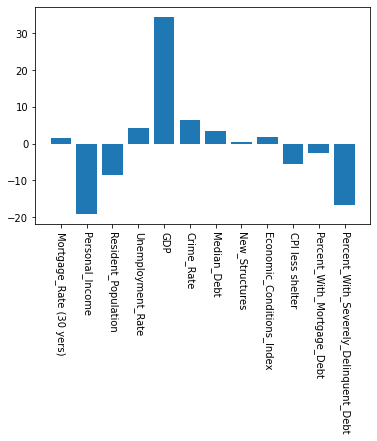

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,1/1/2017,187.094273,4.15,73093.00000,19322.60700,4.5,1699894.281,573.415200,28.13%,244647.0000,2.90%,3296.999883,2.37,227.812
1,2/1/2017,187.317164,4.17,73382.33333,19318.77675,4.5,1708165.451,570.538525,28.27%,244839.0000,2.90%,4834.364431,2.33,228.898
2,3/1/2017,188.763919,4.20,73671.66667,19314.94650,4.4,1716436.622,567.661850,28.40%,245031.0000,2.90%,4957.019871,2.56,228.609
3,4/1/2017,189.525485,4.05,73961.00000,19311.11625,4.5,1724707.792,564.785175,28.40%,245161.3333,2.80%,2877.676720,2.69,228.849
4,5/1/2017,189.956917,4.01,74250.33333,19307.28600,4.5,1732978.962,561.908500,28.40%,245291.6667,2.70%,5466.221827,2.80,228.984
5,6/1/2017,190.052705,3.90,74539.66667,19303.45575,4.6,1741250.132,559.031825,28.40%,245422.0000,2.60%,3850.093982,3.07,229.351
6,7/1/2017,190.840081,3.97,74829.00000,19299.62550,4.6,1749521.303,556.155150,28.27%,245491.6667,2.57%,4010.836341,3.04,228.127
7,8/1/2017,191.882768,3.88,75118.33333,19295.79525,4.6,1757792.473,553.278475,28.13%,245561.3333,2.53%,3118.553708,2.92,228.207
8,9/1/2017,192.949840,3.81,75407.66667,19291.96500,4.6,1766063.643,550.401800,28.00%,245631.0000,2.50%,2928.686450,2.79,230.219
9,10/1/2017,194.414177,3.90,75697.00000,19288.13475,4.5,1774334.813,547.525125,27.90%,245540.3333,2.47%,3500.473181,2.54,229.361


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2017,187.094273,4.15,73093.00000,19322.60700,4.5,1699894.281,573.415200,244647.0000,3296.999883,2.37,227.812,28.13,2.9
1,2/1/2017,187.317164,4.17,73382.33333,19318.77675,4.5,1708165.451,570.538525,244839.0000,4834.364431,2.33,228.898,28.27,2.9
2,3/1/2017,188.763919,4.20,73671.66667,19314.94650,4.4,1716436.622,567.661850,245031.0000,4957.019871,2.56,228.609,28.40,2.9
3,4/1/2017,189.525485,4.05,73961.00000,19311.11625,4.5,1724707.792,564.785175,245161.3333,2877.676720,2.69,228.849,28.40,2.8
4,5/1/2017,189.956917,4.01,74250.33333,19307.28600,4.5,1732978.962,561.908500,245291.6667,5466.221827,2.80,228.984,28.40,2.7


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.15,73093.00000,19322.60700,4.5,1699894.281,573.415200,244647.0000,3296.999883,2.37,227.812,28.13,2.90
1,4.17,73382.33333,19318.77675,4.5,1708165.451,570.538525,244839.0000,4834.364431,2.33,228.898,28.27,2.90
2,4.20,73671.66667,19314.94650,4.4,1716436.622,567.661850,245031.0000,4957.019871,2.56,228.609,28.40,2.90
3,4.05,73961.00000,19311.11625,4.5,1724707.792,564.785175,245161.3333,2877.676720,2.69,228.849,28.40,2.80
4,4.01,74250.33333,19307.28600,4.5,1732978.962,561.908500,245291.6667,5466.221827,2.80,228.984,28.40,2.70
5,3.90,74539.66667,19303.45575,4.6,1741250.132,559.031825,245422.0000,3850.093982,3.07,229.351,28.40,2.60
6,3.97,74829.00000,19299.62550,4.6,1749521.303,556.155150,245491.6667,4010.836341,3.04,228.127,28.27,2.57
7,3.88,75118.33333,19295.79525,4.6,1757792.473,553.278475,245561.3333,3118.553708,2.92,228.207,28.13,2.53
8,3.81,75407.66667,19291.96500,4.6,1766063.643,550.401800,245631.0000,2928.686450,2.79,230.219,28.00,2.50
9,3.90,75697.00000,19288.13475,4.5,1774334.813,547.525125,245540.3333,3500.473181,2.54,229.361,27.90,2.47


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,3.992500e+00,0.125635,3.810000e+00,3.900000e+00,3.960000e+00,4.075000e+00,4.200000e+00
Personal_Income,12.0,7.468433e+04,1043.206169,7.309300e+04,7.388867e+04,7.468433e+04,7.548000e+04,7.627567e+04
Resident_Population,12.0,1.930154e+04,13.810163,1.928047e+04,1.929101e+04,1.930154e+04,1.931207e+04,1.932261e+04
Unemployment_Rate,12.0,4.516667e+00,0.071774,4.400000e+00,4.500000e+00,4.500000e+00,4.600000e+00,4.600000e+00
GDP,12.0,1.745386e+06,29822.128501,1.699894e+06,1.722640e+06,1.745386e+06,1.768131e+06,1.790877e+06
Crime_Rate,12.0,5.575935e+02,10.371999,5.417718e+02,5.496826e+02,5.575935e+02,5.655043e+02,5.734152e+02
Median_Debt,12.0,2.452854e+05,307.653029,2.446470e+05,2.451287e+05,2.453905e+05,2.455038e+05,2.456310e+05
New_Structures,12.0,3.849055e+03,843.433417,2.877677e+03,3.252388e+03,3.675284e+03,4.216718e+03,5.466222e+03
Economic_Conditions_Index,12.0,2.719167e+00,0.237006,2.330000e+00,2.555000e+00,2.750000e+00,2.837500e+00,3.070000e+00
CPI less shelter,12.0,2.288540e+02,0.638933,2.278120e+02,2.285085e+02,2.288845e+02,2.290757e+02,2.302190e+02


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.649605,2.249252,1.289152,-1.135183,1.938478,-1.106658,0.110909,-0.052457,0.028328,1.059366,-2.340426,-0.680746
1,-0.630636,2.294417,1.267460,-1.135183,1.985944,-1.191466,0.131269,0.589716,-0.000201,1.143772,-2.259906,-0.680746
2,-0.602184,2.339582,1.245767,-1.190199,2.033411,-1.276273,0.151629,0.640951,0.163838,1.121310,-2.185137,-0.680746
3,-0.744447,2.384747,1.224074,-1.135183,2.080877,-1.361080,0.165450,-0.227612,0.256555,1.139963,-2.185137,-0.722448
4,-0.782384,2.429912,1.202382,-1.135183,2.128343,-1.445888,0.179271,0.853650,0.335008,1.150456,-2.185137,-0.764150
5,-0.886711,2.475078,1.180689,-1.080168,2.175809,-1.530695,0.193092,0.178576,0.527575,1.178980,-2.185137,-0.805853
6,-0.820322,2.520243,1.158997,-1.080168,2.223275,-1.615503,0.200479,0.245720,0.506179,1.083849,-2.259906,-0.818363
7,-0.905680,2.565408,1.137304,-1.080168,2.270741,-1.700310,0.207867,-0.126995,0.420594,1.090066,-2.340426,-0.835044
8,-0.972070,2.610573,1.115612,-1.080168,2.318207,-1.785118,0.215254,-0.206305,0.327876,1.246442,-2.415195,-0.847555
9,-0.886711,2.655738,1.093919,-1.135183,2.365673,-1.869925,0.205640,0.032536,0.149573,1.179757,-2.472709,-0.860066


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[193.0578738  193.20347114 193.75893791 194.51621222 196.26809571
 197.30224544 198.76489832 199.16801955 198.82358343 199.64982077
 200.96172069 201.53441363]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,193.057874
1,193.203471
2,193.758938
3,194.516212
4,196.268096
5,197.302245
6,198.764898
7,199.168020
8,198.823583
9,199.649821
